In [ ]:
# Data Source - https://drive.google.com/drive/folders/10SUoVOHnv95fLr-w2HSktjQUd96jXA3U?usp=sharing
# Dataset - https://drive.google.com/file/d/1HqTcjEjTTb9-4o6RezlY3BHwHFeQdbn9/view?usp=sharing

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/Housing.csv')
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
# null value check
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [ ]:
# datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


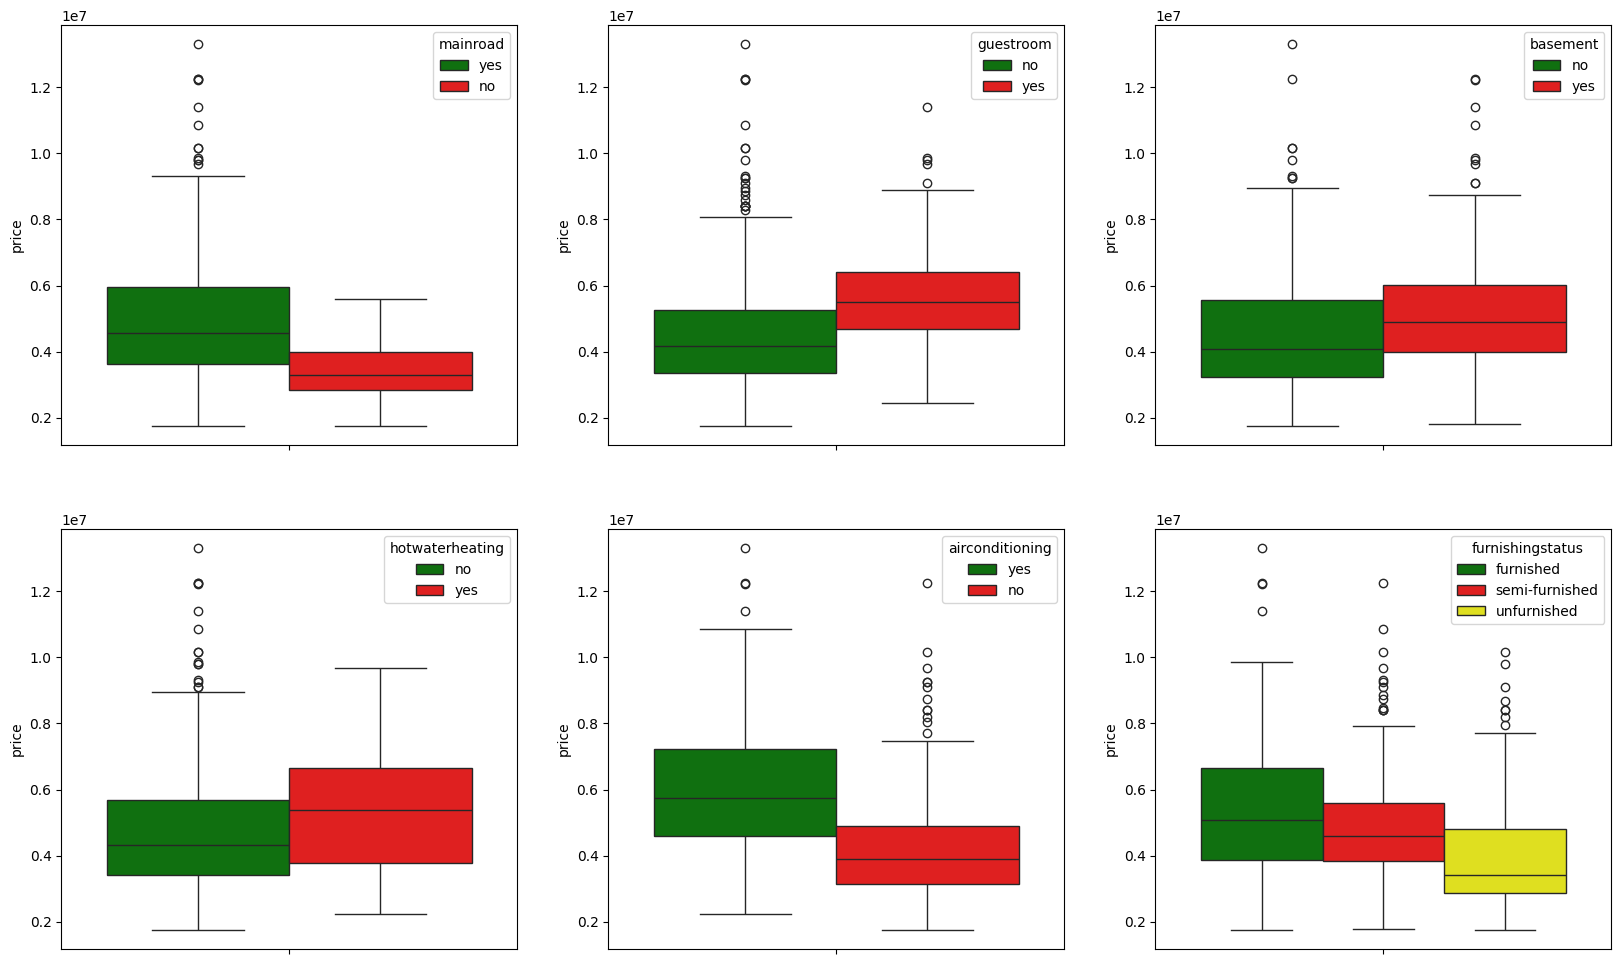

In [ ]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(hue = 'mainroad', y = 'price', data = data, palette=['green', 'red'])
plt.subplot(2,3,2)
sns.boxplot(hue = 'guestroom', y = 'price', data = data, palette=['green', 'red'])
plt.subplot(2,3,3)
sns.boxplot(hue = 'basement', y = 'price', data = data, palette=['green', 'red'])
plt.subplot(2,3,4)
sns.boxplot(hue = 'hotwaterheating', y = 'price', data = data, palette=['green', 'red'])
plt.subplot(2,3,5)
sns.boxplot(hue = 'airconditioning', y = 'price', data = data, palette=['green', 'red'])
plt.subplot(2,3,6)
sns.boxplot(hue = 'furnishingstatus', y = 'price', data = data, palette=['green', 'red', 'yellow'])
plt.show()

In [ ]:
cat_cols = [cols for cols in data if data[cols].dtype == 'O']
cat_cols

['mainroad',
 'guestroom',
 'basement',
 'hotwaterheating',
 'airconditioning',
 'prefarea',
 'furnishingstatus']

In [ ]:
ddata = pd.get_dummies(data, drop_first=True, dtype='int')
ddata.columns = ddata.columns.str.replace('_yes', '')
ddata.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,1,0,0,0,1,1,0,0
1,12250000,8960,4,4,4,3,1,0,0,0,1,0,0,0
2,12250000,9960,3,2,2,2,1,0,1,0,0,1,1,0
3,12215000,7500,4,2,2,3,1,0,1,0,1,1,0,0
4,11410000,7420,4,1,2,2,1,1,1,0,1,0,0,0


In [ ]:
# train test split
from sklearn.model_selection import train_test_split
train, test = train_test_split(ddata, test_size=0.3, random_state=42)

In [ ]:
train.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
126,5880000,7160,3,1,1,2,1,0,1,0,0,1,0,1
363,3710000,3584,2,1,1,0,1,0,0,1,0,0,1,0
370,3640000,4280,2,1,1,2,1,0,0,0,1,0,1,0
31,8400000,7000,3,1,4,2,1,0,0,0,1,0,1,0
113,6083000,9620,3,1,1,2,1,0,1,0,0,1,0,0


In [ ]:
# normalising the train data - MinMaxScaler
cols = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']

from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
train[cols] = scale.fit_transform(train[cols])

In [ ]:
train.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
126,0.393333,0.378694,0.4,0.0,0.0,0.666667,1,0,1,0,0,1,0,1
363,0.186667,0.132921,0.2,0.0,0.0,0.000000,1,0,0,1,0,0,1,0
370,0.180000,0.180756,0.2,0.0,0.0,0.666667,1,0,0,0,1,0,1,0
31,0.633333,0.367698,0.4,0.0,1.0,0.666667,1,0,0,0,1,0,1,0
113,0.412667,0.547766,0.4,0.0,0.0,0.666667,1,0,1,0,0,1,0,0


In [ ]:
# normalising the test data
test[cols] = scale.transform(test[cols])

In [ ]:
# training data split
x_train = train.drop(['price'], axis=1)
y_train = train['price']

In [ ]:
x_train.head()

,area,bedrooms,bathrooms,stories,parking,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
126,0.378694,0.4,0.0,0.0,0.666667,1,0,1,0,0,1,0,1
363,0.132921,0.2,0.0,0.0,0.000000,1,0,0,1,0,0,1,0
370,0.180756,0.2,0.0,0.0,0.666667,1,0,0,0,1,0,1,0
31,0.367698,0.4,0.0,1.0,0.666667,1,0,0,0,1,0,1,0
113,0.547766,0.4,0.0,0.0,0.666667,1,0,1,0,0,1,0,0


# Model Building

In [ ]:
# simple linear regression
import statsmodels.api as sm

# add constant
lr_data = sm.add_constant(x_train['area'])

# fitting the data into the model
lr_model = sm.OLS(y_train, lr_data).fit()

In [ ]:
# model params
lr_model.params

# y = 0.138005 + 0.622805x(area)

const    0.138005
area     0.622805
dtype: float64

In [ ]:
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.304
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     165.6
Date:                Tue, 14 May 2024   Prob (F-statistic):           1.10e-31
Time:                        03:46:53   Log-Likelihood:                 206.23
No. Observations:                 381   AIC:                            -408.5
Df Residuals:                     379   BIC:                            -400.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1380      0.014     10.113      0.0

In [ ]:
# Model with two variable
lr_data = sm.add_constant(x_train[['area', 'bedrooms']])

# fit the model
lr_model = sm.OLS(y_train, lr_data).fit()

In [ ]:
# model params
lr_model.params

# y = 0.016850 + 0.571025x(area) + 0.340993x(bedrooms)

const       0.016850
area        0.571025
bedrooms    0.340993
dtype: float64

In [ ]:
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.394
Model:                            OLS   Adj. R-squared:                  0.391
Method:                 Least Squares   F-statistic:                     123.0
Date:                Tue, 14 May 2024   Prob (F-statistic):           7.31e-42
Time:                        03:49:44   Log-Likelihood:                 232.66
No. Observations:                 381   AIC:                            -459.3
Df Residuals:                     378   BIC:                            -447.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0169      0.021      0.819      0.4

In [ ]:
# model with three variables
lr_data = sm.add_constant(x_train[['area', 'bedrooms', 'bathrooms']])

# fit the model
lr_model = sm.OLS(y_train, lr_data).fit()

In [ ]:
# model params
lr_model.params

# y = 0.058988 + 0.514724x(area) + 0.178237x(bedrooms) + 0.400707xbathrooms

const        0.058988
area         0.514724
bedrooms     0.178237
bathrooms    0.400707
dtype: float64

In [ ]:
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.509
Model:                            OLS   Adj. R-squared:                  0.506
Method:                 Least Squares   F-statistic:                     130.5
Date:                Tue, 14 May 2024   Prob (F-statistic):           5.57e-58
Time:                        03:51:26   Log-Likelihood:                 272.85
No. Observations:                 381   AIC:                            -537.7
Df Residuals:                     377   BIC:                            -521.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0590      0.019      3.092      0.0

In [ ]:
# Fitting all the data at once
mlr_data = sm.add_constant(x_train)
mlr_model = sm.OLS(y_train, mlr_data).fit()

In [ ]:
# parameters of OLS model
mlr_model.params

const                              0.035869
area                               0.350984
bedrooms                           0.038521
bathrooms                          0.318500
stories                            0.119219
parking                            0.086603
mainroad                           0.038864
guestroom                          0.026258
basement                           0.045962
hotwaterheating                    0.058702
airconditioning                    0.065318
prefarea                           0.048494
furnishingstatus_semi-furnished   -0.011586
furnishingstatus_unfurnished      -0.037256
dtype: float64

In [ ]:
print(mlr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     63.79
Date:                Tue, 14 May 2024   Prob (F-statistic):           1.00e-85
Time:                        03:54:11   Log-Likelihood:                 362.28
No. Observations:                 381   AIC:                            -696.6
Df Residuals:                     367   BIC:                            -641.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [ ]:
# the model is stats significant but few cols are not stats significant
    # reason is that it may have multicollinarity
    # using VIF (variable inflaction factor) we can fix the insignificance

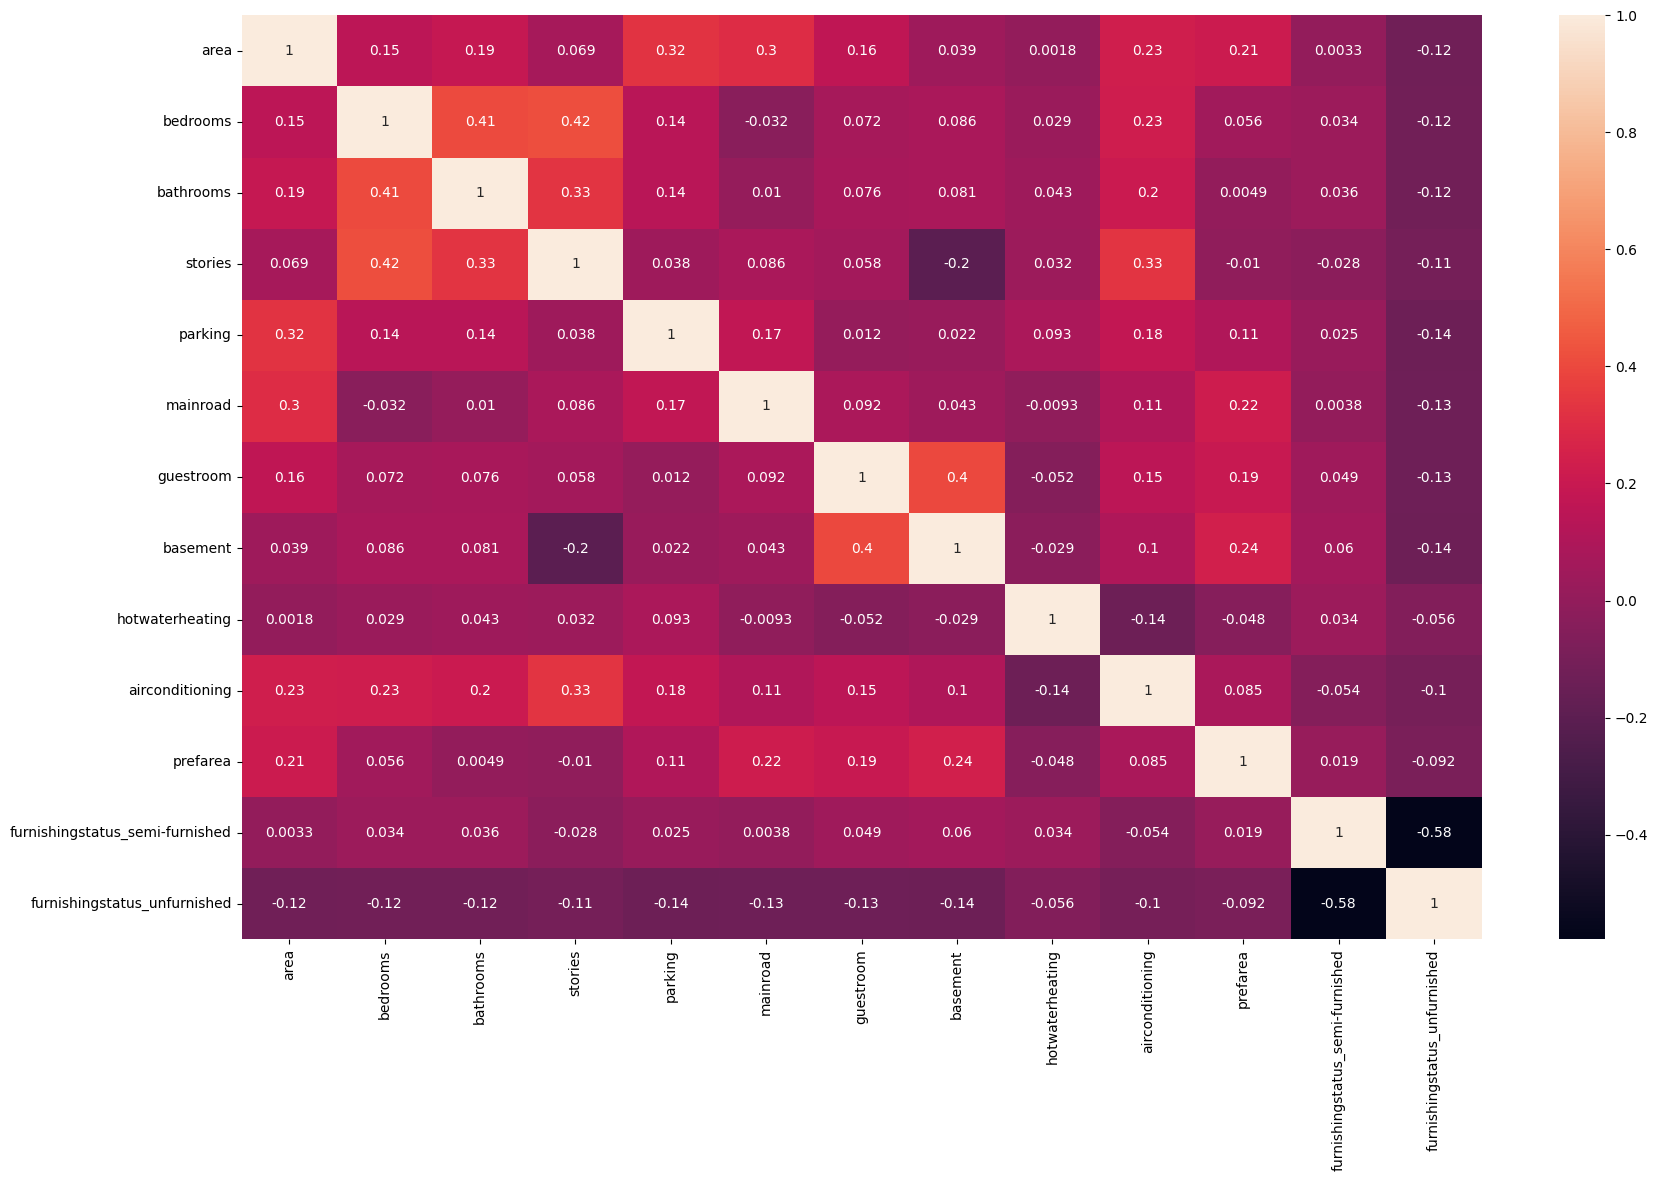

In [ ]:
plt.figure(figsize=(20, 12))
sns.heatmap(x_train.corr(), annot=True)
plt.show()

In [ ]:
# VIF method - VIF > 5 is bad and VIF < 5 is good
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
# dataframe with column name and respective vif
vif = pd.DataFrame()
vif['Features'] = x_train.columns
vif['VIF'] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending=False)

In [ ]:
vif

,Features,VIF
1,bedrooms,7.71
5,mainroad,6.01
0,area,4.59
3,stories,2.86
11,furnishingstatus_semi-furnished,2.24
7,basement,2.17
4,parking,1.94
9,airconditioning,1.88
12,furnishingstatus_unfurnished,1.82
2,bathrooms,1.67


In [ ]:
# Dropping "furnishingstatus_semi-furnished" since it is stats insignificant
x = x_train.drop(['furnishingstatus_semi-furnished'], axis=1)


In [ ]:
# model building
x_train_lm = sm.add_constant(x)
mlr_2 = sm.OLS(y_train, x_train_lm).fit()

In [ ]:
print(mlr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     69.05
Date:                Tue, 14 May 2024   Prob (F-statistic):           1.83e-86
Time:                        04:09:36   Log-Likelihood:                 361.82
No. Observations:                 381   AIC:                            -697.6
Df Residuals:                     368   BIC:                            -646.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [ ]:
# dataframe with column name and respective vif
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending=False)

In [ ]:
vif

,Features,VIF
1,bedrooms,6.90
5,mainroad,5.67
0,area,4.58
3,stories,2.85
7,basement,2.17
4,parking,1.94
9,airconditioning,1.86
2,bathrooms,1.67
6,guestroom,1.56
10,prefarea,1.50


In [ ]:
# removing the "bedroom" since it has VIF > 5
x = x.drop(['bedrooms'], axis=1)

In [ ]:
# model building
x_train_lm = sm.add_constant(x)
mlr_3 = sm.OLS(y_train, x_train_lm).fit()

In [ ]:
# summary
print(mlr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     75.24
Date:                Tue, 14 May 2024   Prob (F-statistic):           3.31e-87
Time:                        04:12:55   Log-Likelihood:                 361.32
No. Observations:                 381   AIC:                            -698.6
Df Residuals:                     369   BIC:                            -651.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [ ]:
# dataframe with column name and respective vif
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending=False)

In [ ]:
vif

,Features,VIF
4,mainroad,4.94
0,area,4.35
2,stories,2.36
6,basement,1.99
3,parking,1.92
8,airconditioning,1.86
1,bathrooms,1.59
5,guestroom,1.56
9,prefarea,1.50
10,furnishingstatus_unfurnished,1.32


In [ ]:
# removing the "guestroom" since it is stats insignificant
x = x.drop(['guestroom'], axis=1)

In [ ]:
# model building
x_train_lm = sm.add_constant(x)
mlr_4 = sm.OLS(y_train, x_train_lm).fit()

In [ ]:
# summary
print(mlr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     81.94
Date:                Tue, 14 May 2024   Prob (F-statistic):           1.79e-87
Time:                        04:16:34   Log-Likelihood:                 359.63
No. Observations:                 381   AIC:                            -697.3
Df Residuals:                     370   BIC:                            -653.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [ ]:
# dataframe with column name and respective vif
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending=False)

In [ ]:
vif

,Features,VIF
4,mainroad,4.94
0,area,4.29
2,stories,2.33
3,parking,1.91
7,airconditioning,1.86
5,basement,1.70
1,bathrooms,1.59
8,prefarea,1.49
9,furnishingstatus_unfurnished,1.31
6,hotwaterheating,1.10


In [ ]:
# redisual analysis
y_train_pred = mlr_4.predict(x_train_lm)
res = y_train - y_train_pred

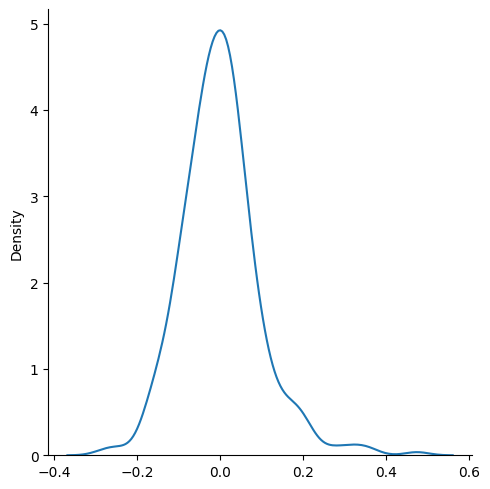

In [ ]:
# residual should follow normal distribution
sns.displot(res, kind='kde')
plt.show()

In [ ]:
# Making test predictions

x_test = test.drop(['price'], axis=1)
y_test = test['price']

In [ ]:
# adding constant
x_test_m4_data = sm.add_constant(x_test)

In [ ]:
# removing the variable that are dropped
x_test_m4_data = x_test_m4_data.drop(['furnishingstatus_semi-furnished', 'bedrooms', 'guestroom'], axis=1)

In [ ]:
# making prediction on the data
y_pred_m4 = mlr_4.predict(x_test_m4_data)

In [ ]:
# model summary
from sklearn.metrics import mean_squared_error, r2_score
print(round(r2_score(y_test, y_pred_m4), 2))

0.69


In [ ]:
mlr_4.params

const                           0.037996
area                            0.363746
bathrooms                       0.325360
stories                         0.132029
parking                         0.086382
mainroad                        0.037990
basement                        0.056184
hotwaterheating                 0.057596
airconditioning                 0.067528
prefarea                        0.050580
furnishingstatus_unfurnished   -0.031136
dtype: float64

In [ ]:
# model equation

# price = 0.037996 + 0.363746xarea + 0.325360xbathrooms + 0.132029xstories + 0.086382xpaking ......